In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
mortality = pd.read_csv("Overledenen__belangrijke_doodsoorzaken__korte_lijst___leeftijd__geslacht_13122022_224332.csv", sep=";", skiprows=4)

In [4]:
mortality.drop("Perioden", axis=1, inplace=True)

In [5]:
mortality["Unnamed: 0"].tolist()

['Onderwerp',
 'Totaal onderliggende doodsoorzaken',
 '1 Infectieuze en parasitaire ziekten|Totaal infectieuze en parasitaire zktn',
 '1 Infectieuze en parasitaire ziekten|1.1 Tuberculose',
 '1 Infectieuze en parasitaire ziekten|1.2 Meningokokkeninfecties',
 '1 Infectieuze en parasitaire ziekten|1.3 Virale hepatitis',
 '1 Infectieuze en parasitaire ziekten|1.4 AIDS',
 '1 Infectieuze en parasitaire ziekten|1.5 Ov. infectieuze en parasitaire zktn',
 '2 Nieuwvormingen|Totaal nieuwvormingen',
 '2 Nieuwvormingen|2.1 Kwaadaardige nieuwvormingen|Totaal kwaadaardige nieuwvormingen',
 '2 Nieuwvormingen|2.1 Kwaadaardige nieuwvormingen|2.1.1 Kw. nv. van lip, mond en keel',
 '2 Nieuwvormingen|2.1 Kwaadaardige nieuwvormingen|2.1.2 Kw. nv. van slokdarm',
 '2 Nieuwvormingen|2.1 Kwaadaardige nieuwvormingen|2.1.3 Kw. nv. van maag',
 '2 Nieuwvormingen|2.1 Kwaadaardige nieuwvormingen|2.1.4 Kw. nv. van dikke darm',
 '2 Nieuwvormingen|2.1 Kwaadaardige nieuwvormingen|2.1.5 Kw. nv. van endeldarm en anus',
 '

In [6]:
mortality = mortality.loc[mortality["Unnamed: 0"].isin(['Onderwerp', '7 Ziekten van hart en vaatstelsel|Totaal ziekten van hart en vaatstelsel', 'Totaal onderliggende doodsoorzaken',  '2 Nieuwvormingen|2.1 Kwaadaardige nieuwvormingen|Totaal kwaadaardige nieuwvormingen'])]   

In [7]:
mortality=mortality.transpose()

In [8]:
mortality.columns = mortality.iloc[0]

In [9]:
mortality.drop(mortality.index[0], inplace=True)

In [10]:
mortality.columns.name = ""

In [11]:
mortality.reset_index(inplace=True)

In [12]:
mortality.rename(columns={"index": "Year", "Totaal onderliggende doodsoorzaken": "Total", "2 Nieuwvormingen|2.1 Kwaadaardige nieuwvormingen|Totaal kwaadaardige nieuwvormingen": "Cancer", "7 Ziekten van hart en vaatstelsel|Totaal ziekten van hart en vaatstelsel" : "Cardiovascular diseases"}, inplace=True)

In [13]:
mortality['Year'] = mortality['Year'].str[0:4]

In [14]:
mortality.iloc[:, 2:]= mortality.iloc[:, 2:].apply(pd.to_numeric)

In [15]:
mortality

,Year,Onderwerp,Total,Cancer,Cardiovascular diseases
0,2013,0 jaar,292,2,6
1,2013,1 tot 5 jaar,40,7,1
2,2013,5 tot 10 jaar,27,8,0
3,2013,10 tot 15 jaar,40,6,0
4,2013,15 tot 20 jaar,79,14,3
...,...,...,...,...,...
184,2021,75 tot 80 jaar,9881,3251,1964
185,2021,80 tot 85 jaar,13059,3020,3000
186,2021,85 tot 90 jaar,16805,2452,4557
187,2021,90 tot 95 jaar,14832,1340,4179


In [16]:
groups =mortality.groupby("Year")

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
data=pd.DataFrame()
for name, group in groups:  
    for i, j in zip([(0,9),(10,11), (12, 13), (14, 15), (16, 17), (18, 19), (20, 21)], ["0-44","45-54", "55-64", "65-74", "75-84", "85-94", "95+"]):
        #summate younger groups
        summated =group.iloc[i[0]:i[1]].sum()
        temp_series = pd.Series({"Year": name, "Onderwerp": j, "Total": summated[2], "Cancer": summated[3], "Cardiovascular diseases": summated[4]})
        #remove them
        #group = group[10:]
        group = group.append(temp_series,  ignore_index=True)

    group = group.apply(np.roll, shift=7)
    group = group[:7]

    group["Cancer percentage"] = group["Cancer"]/group["Total"] * 100
    group["Cardiovascular diseases percentage"] = group["Cardiovascular diseases"]/group["Total"] * 100
    data = pd.concat([data, group])

In [19]:
data =data.rename(columns={"Onderwerp": "Age group"})

In [20]:
subset=data.loc[data["Age group"].isin(["0-44", "45-54", "55-64"])]

In [21]:
mortality

,Year,Onderwerp,Total,Cancer,Cardiovascular diseases
0,2013,0 jaar,292,2,6
1,2013,1 tot 5 jaar,40,7,1
2,2013,5 tot 10 jaar,27,8,0
3,2013,10 tot 15 jaar,40,6,0
4,2013,15 tot 20 jaar,79,14,3
...,...,...,...,...,...
184,2021,75 tot 80 jaar,9881,3251,1964
185,2021,80 tot 85 jaar,13059,3020,3000
186,2021,85 tot 90 jaar,16805,2452,4557
187,2021,90 tot 95 jaar,14832,1340,4179


# Absolute

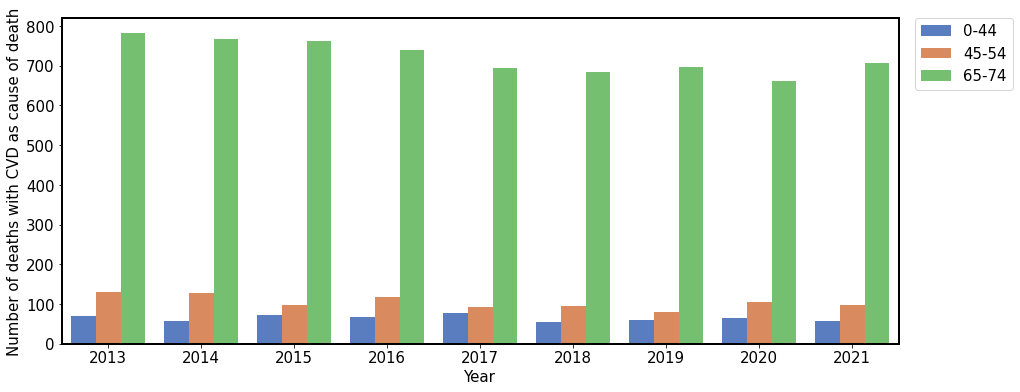

In [42]:
fig, ax = plt.subplots(1,1, figsize=(15,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)


sns.barplot(data=subset, x="Year" , y="Cardiovascular diseases", hue="Age group", ax=ax, palette=sns.color_palette("muted", 7))

#sns.barplot(data=data, x="Year", y="Cancer percentage", hue="Onderwerp", alpha=.2, ax=ax)

#plt.title('Prevalence of medical risk factors, '  + name)
plt.xlabel('Year')
plt.ylabel('Number of deaths with CVD as cause of death')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
plt.savefig("absolute_status_cvd.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()


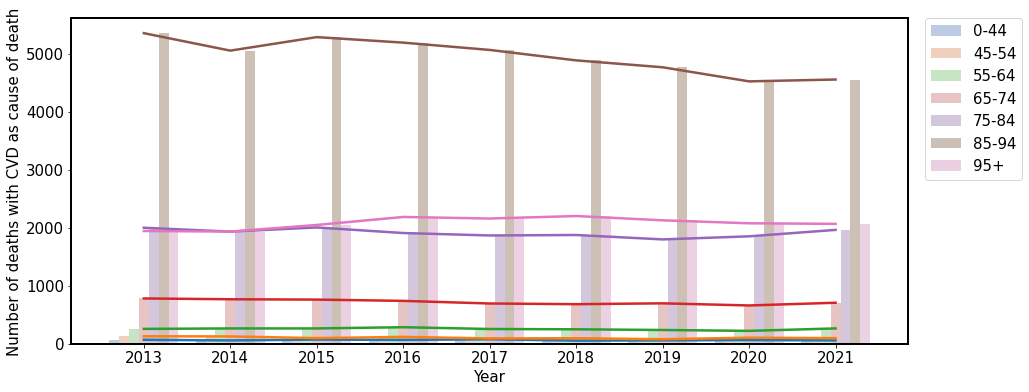

In [48]:
fig, ax = plt.subplots(1,1, figsize=(15,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)


sns.barplot(data=data, x="Year" , y="Cardiovascular diseases", alpha=0.4, hue="Age group", ax=ax, palette=sns.color_palette("muted", 7))

age_groups = data.groupby("Age group")

for name, group in age_groups:
    # if name == "75-84":
    #     break
    group.reset_index(drop=True, inplace=True)
    sns.lineplot(data=group, x="Year", y="Cardiovascular diseases", ax=ax, linewidth=2.5)

#plt.title('Prevalence of medical risk factors, '  + name)
plt.xlabel('Year')
plt.ylabel('Number of deaths with CVD as cause of death')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
plt.savefig("absolute_plateau_cvd.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()


# Percentage

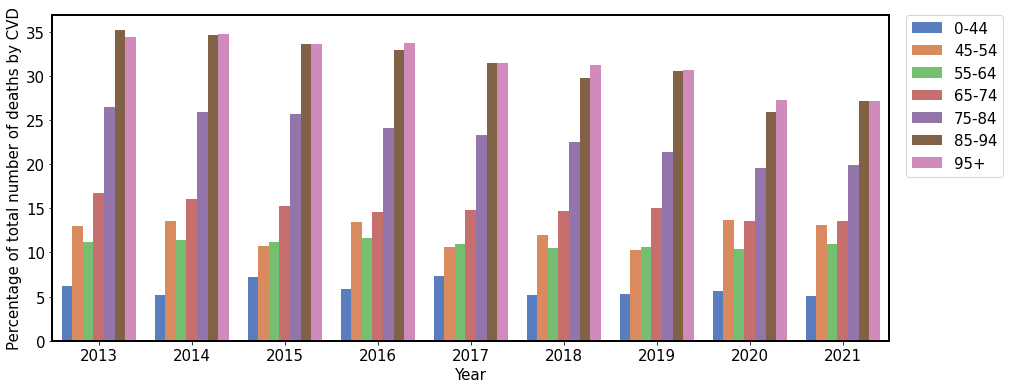

In [44]:
fig, ax = plt.subplots(1,1, figsize=(15,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)


sns.barplot(data=data, x="Year" , y="Cardiovascular diseases percentage", hue="Age group", ax=ax, palette=sns.color_palette("muted", 7))

#sns.barplot(data=data, x="Year", y="Cancer percentage", hue="Onderwerp", alpha=.2, ax=ax)

#plt.title('Prevalence of medical risk factors, '  + name)
plt.xlabel('Year')
plt.ylabel('Percentage of total number of deaths by CVD')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
plt.savefig("percentage_status_cvd.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()


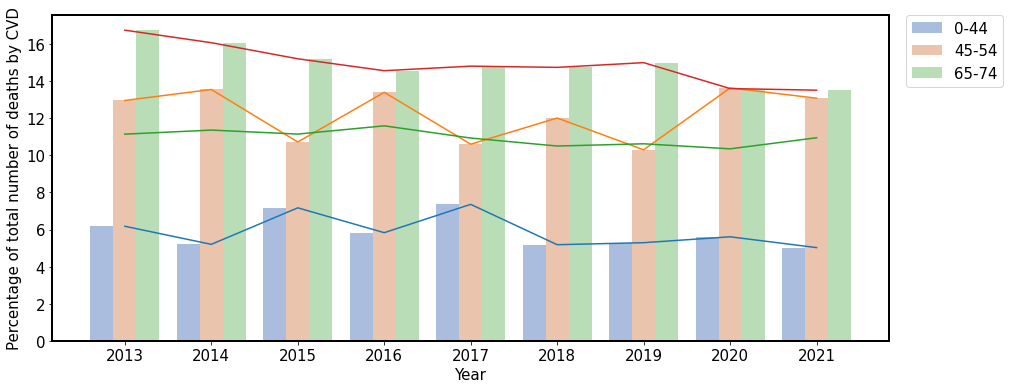

In [45]:
fig, ax = plt.subplots(1,1, figsize=(15,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)


sns.barplot(data=subset, x="Year" , y="Cardiovascular diseases percentage", alpha=0.5, hue="Age group", ax=ax, palette=sns.color_palette("muted", 7))

age_groups = data.groupby("Age group")

for name, group in age_groups:
    if name == "75-84":
        break
    group.reset_index(drop=True, inplace=True)
    sns.lineplot(data=group, x="Year", y="Cardiovascular diseases percentage", ax=ax)

#plt.title('Prevalence of medical risk factors, '  + name)
plt.xlabel('Year')
plt.ylabel('Percentage of total number of deaths by CVD')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
plt.savefig("relative_plateau_cvd.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()


In [53]:
subset.loc[subset["Year"].astype("int") >= 2015]

,Year,Age group,Total,Cancer,Cardiovascular diseases,Cancer percentage,Cardiovascular diseases percentage
0,2015,0-44,1018,246,73,24.165029,7.170923
1,2015,45-54,914,510,98,55.798687,10.722101
3,2015,65-74,5010,2728,762,54.451098,15.209581
0,2016,0-44,1149,276,67,24.020888,5.831158
1,2016,45-54,888,471,119,53.040541,13.400901
3,2016,65-74,5080,2788,740,54.881890,14.566929
0,2017,0-44,1060,239,78,22.547170,7.358491
1,2017,45-54,877,491,93,55.986317,10.604333
3,2017,65-74,4692,2456,695,52.344416,14.812447
0,2018,0-44,1042,239,54,22.936660,5.182342


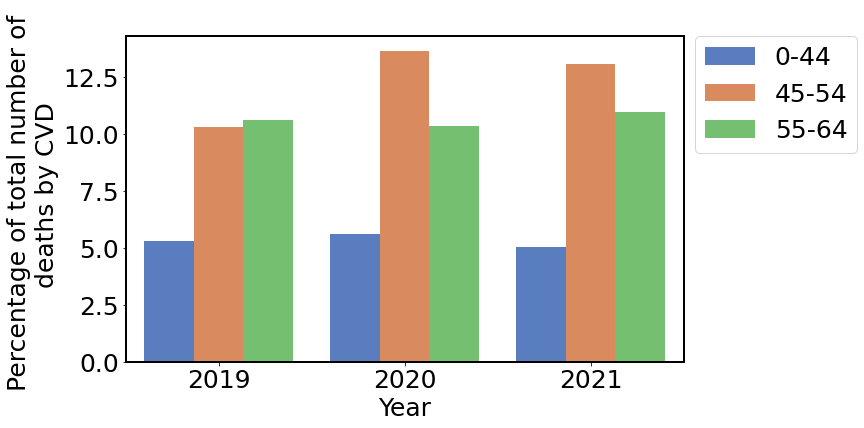

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 25}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)

temp = subset.loc[subset["Year"].astype("int") >= 2019]

sns.barplot(data=temp, x="Year" , y="Cardiovascular diseases percentage", hue="Age group", ax=ax, palette=sns.color_palette("muted", 7))

# age_groups = data.groupby("Age group")

# for name, group in age_groups:
#     if name == "75-84":
#         break
#     group.reset_index(drop=True, inplace=True)
#     sns.lineplot(data=group, x="Year", y="Cardiovascular diseases percentage", ax=ax)

#plt.title('Prevalence of medical risk factors, '  + name)
plt.xlabel('Year')
plt.ylabel('Percentage of total number of \n deaths by CVD')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
plt.savefig("relative_plateau_cvd2.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()
